## Project 1: Part 2

Functions to adjust the image in case the histogram does not fill the RGB range

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adjust_brightness_contrast(image_array, alpha, beta):
    # Convert to floating point to avoid overflow and underflow
    temp = image_array.astype('float32')

    # Adjust contrast
    temp *= alpha

    # Adjust brightness
    temp += beta

    # Clip values to be in the range [0, 255]
    temp = np.clip(temp, 0, 255)

    return temp.astype('uint8')

def gamma_correction(img, gamma):
    # Normalize the image to [0, 1], apply gamma correction, and then scale back to [0, 255]
    corrected = 255.0 * (img / 255.0) ** gamma
    # Return the corrected image
    return np.uint8(corrected)

Importing the image into Jupyter Notebook and analyzing its RGB histogram.

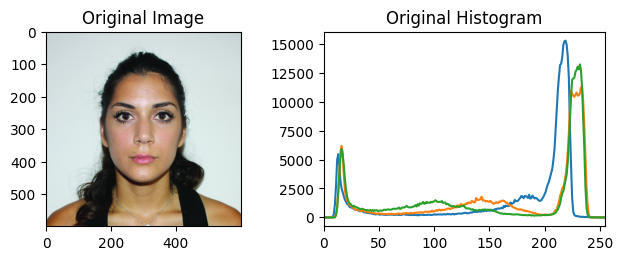

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Image with default of color image
img = cv2.imread("my_face.JPG")

# Convert image_data to RGB due to openCV's architecture
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Displaying original image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.title('Original Image')

#Plotting red channel of original image's histogram
plt.subplot(2, 2, 2)
hist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])

#Plotting green channel of original image's histogram
hist = cv2.calcHist([img],[1],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])

#Plotting blue channel of original image's histogram
hist = cv2.calcHist([img],[2],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])

plt.title('Original Histogram')
plt.tight_layout()

### Image Adjustment
I went ahead and experimented with adjusting the image using several of the histogram adjustment algorithms we discussed in class. In the end, it turns out the my image didn't really need anything. I could have guessed this based on the original histogram and how the image was processed when originally taken, but it was fun to learn!

#### Brightness & Contrast Linear Adjustment

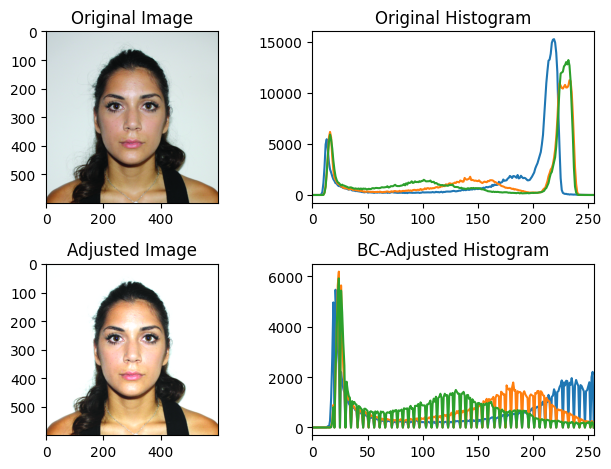

In [6]:
#Adjusting image using linear brightness contrast manipulation
bc_adjusted_img = adjust_brightness_contrast(img, 1.24, 5)

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')

#Plotting red channel of original image's histogram
plt.subplot(2, 2, 2)
hist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])

#Plotting green channel of original image's histogram
hist = cv2.calcHist([img],[1],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])

#Plotting blue channel of original image's histogram
hist = cv2.calcHist([img],[2],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])

plt.title("Original Histogram")

# Calculate histogram of brightness-contrast adjusted image
plt.subplot(2, 2, 3)
plt.imshow(bc_adjusted_img, cmap="gray", vmin=0, vmax=255)
plt.title('Adjusted Image')

#Plotting red channel of brightness contrast adjusted image's histogram
plt.subplot(2, 2, 4)
bc_adjusted_hist_red = cv2.calcHist([bc_adjusted_img],[0],None,[256],[0,255])
plt.plot(bc_adjusted_hist_red)
plt.xlim([0,255])

#Plotting green channel of brightness contrast adjusted image's histogram
bc_adjusted_hist_green = cv2.calcHist([bc_adjusted_img],[1],None,[256],[0,255])
plt.plot(bc_adjusted_hist_green)
plt.xlim([0,255])

#Plotting blue channel of brightness contrast adjusted image's histogram
bc_adjusted_hist_blue = cv2.calcHist([bc_adjusted_img],[2],None,[256],[0,255])
plt.plot(bc_adjusted_hist_blue)
plt.xlim([0,255])

plt.title('BC-Adjusted Histogram')

plt.tight_layout()
plt.show()

Comparing the Gamma Correction Histogram with my original histogram.

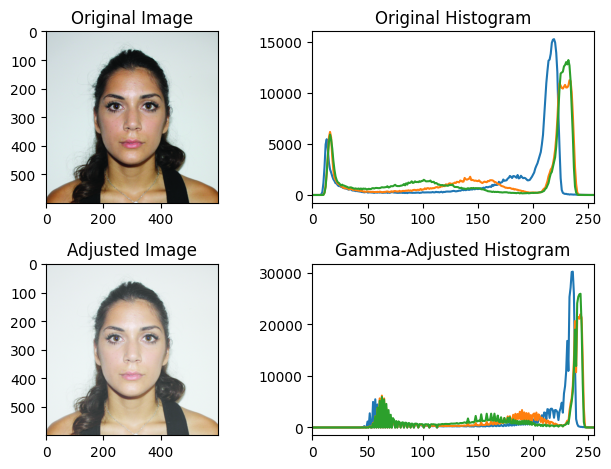

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gamma_correction(img, gamma):
    # Normalize the image to [0, 1], apply gamma correction, and then scale back to [0, 255]
    corrected = 255.0 * (img / 255.0) ** gamma
    # Return the corrected image
    return np.uint8(corrected)

# Load the image
img = cv2.imread("my_face.JPG")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Apply gamma correction and display the result
gamma = 0.5
corrected_image = gamma_correction(img, gamma)

plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title('Original Image')

#Plotting red channel of original image's histogram
plt.subplot(2, 2, 2)
hist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])

#Plotting green channel of original image's histogram
hist = cv2.calcHist([img],[1],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])

#Plotting blue channel of original image's histogram
hist = cv2.calcHist([img],[2],None,[256],[0,255])
plt.plot(hist)
plt.xlim([0,255])

plt.title("Original Histogram")

# Calculate histogram of gamma adjusted image
plt.subplot(2, 2, 3)
plt.imshow(corrected_image, vmin=0, vmax=255)
plt.title('Adjusted Image')

#Plotting red channel of brightness contrast adjusted image's histogram
plt.subplot(2, 2, 4)
gm_adjusted_hist_red = cv2.calcHist([corrected_image],[0],None,[256],[0,255])
plt.plot(gm_adjusted_hist_red)
plt.xlim([0,255])

#Plotting green channel of gamma adjusted image's histogram
gm_adjusted_hist_green = cv2.calcHist([corrected_image],[1],None,[256],[0,255])
plt.plot(gm_adjusted_hist_green)
plt.xlim([0,255])

#Plotting blue channel of gamma adjusted image's histogram
gm_adjusted_hist_blue = cv2.calcHist([corrected_image],[2],None,[256],[0,255])
plt.plot(gm_adjusted_hist_blue)
plt.xlim([0,255])

plt.title('Gamma-Adjusted Histogram')

plt.tight_layout()
plt.show()


In this section, I created a mask of only my face using slicing of arrays to cut out the surrounding environment.

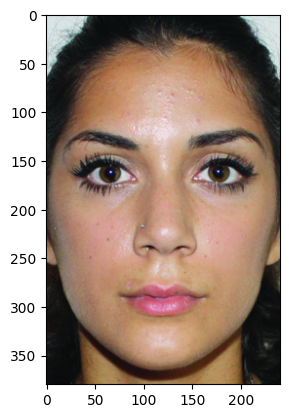

In [8]:
img = cv2.imread("my_face.JPG")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_masked = img[100:480, 180:420]
plt.imshow(img_masked)

I then converted the mask to HSV using openCV's color conversion function. As when I had first been introduced to the concept, I noticed that my HSV histogram would change when I ran it multiple times. As I explored this anomoly, it became clear that I was simply reassigning my masked image to the HSV representation, and that by running this several times, I was trying to convert my already HSV-represented information from RGB to HSV again. I ran the following code exactly three times, the unaware that I was simply converting HSV to HSV using RGB conditions the second two times.

**`img_masked = cv2.cvtColor(img_masked,cv2.COLOR_RGB2HSV)`**

However, as I continued through the pipeline, and extracted my necessary Hue, Saturation and Value points, found the pixel values in that detected range, and then use Bitwise And to extract only the skin of my face, I then got the intended result.

As I backtracked through my work and further analyzed my results, I realized the redudancy and corrected for it. When trying to extract HSV values for identifying inRange, I could not seem to find values that properly represented only the skin on my face as I had with my original mistake. Therefore, I run the RGB to HSV conversion redundantly an additional 2 times, and display the results. I'm guessing somehow my skin's features, through conversion, became emphasized, be it by accident or mathematical logit. Further analysis should be performed to identify if it was really an anomaly or not.




Text(0.5, 1.0, 'HSV Histogram of Mask')

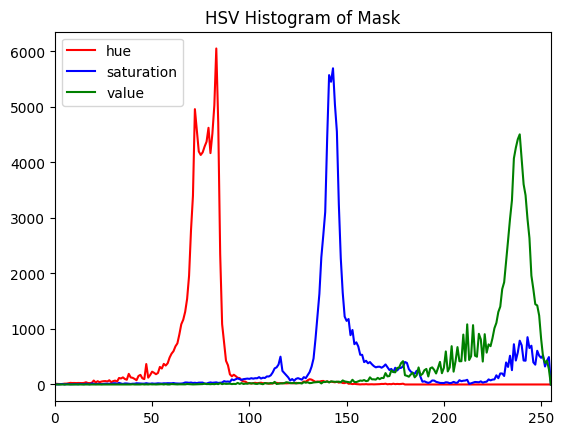

In [9]:
img = cv2.imread("my_face.JPG")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_masked = img[100:480, 180:420]

#Convert color to HSV
for i in range(3):
  img_masked = cv2.cvtColor(img_masked,cv2.COLOR_RGB2HSV)

#Hue plot
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
plt.plot(hist,color='red')
plt.xlim([0,255])

#Saturation plot
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
plt.plot(hist,color='blue')
plt.xlim([0,255])

#Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
plt.plot(hist,color='green')
plt.xlim([0,255])

plt.legend(["hue","saturation","value"],loc = 'upper left')
plt.title("HSV Histogram of Mask")

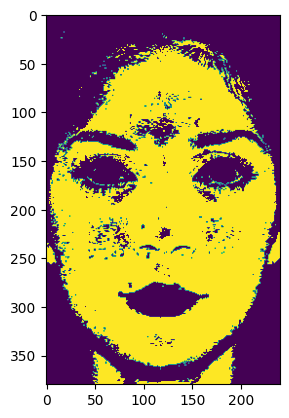

In [10]:
#lower-bound tuple of (Hue, Saturation, Value)
lower_bound = (50,125,222)
#upper-bound tuple of (Hue, Saturation, Value)
upper_bound = (90,150,250)
#finding values in the tonal range of my skin based on my upper and lower bounds
skin_image = cv2.inRange(img_masked, lower_bound, upper_bound)
plt.imshow(skin_image)

##Final Result!

Slightly creepy...

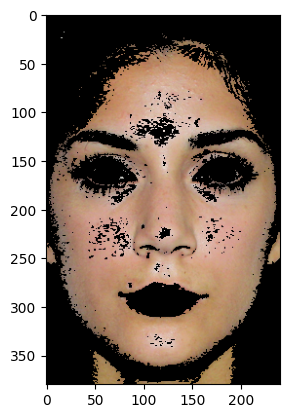

In [11]:
img = cv2.imread("my_face.JPG")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_masked = img[100:480, 180:420]
plt.imshow(img_masked)
#Combining the pixel values of my tonally extracted mask with the original mask of my face to create an image of only my skin tone
output_image = cv2.bitwise_and(img_masked, img_masked, mask = skin_image)
plt.imshow(output_image)